
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [4]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [9]:
# Count countries
num_countries = df['country'].nunique()

print(f"Number of unique countries: {num_countries}")

Number of unique countries: 219


In [11]:
# Get the timespan
start_year = df["year"].min()
end_year = df["year"].max()

print(f"Timespan of the data: {start_year} - {end_year}")

Timespan of the data: 1980 - 2013


#### Does each country have a row for every year present? No. The following are missing (country, year) pairs.

In [17]:
# Get the full range of years and countries
all_years = df['year'].unique()
all_countries = df['country'].unique()

# Create a complete set of (country, year) combinations
expected = pd.MultiIndex.from_product([all_countries, all_years], names=['country', 'year'])

# Find missing (country, year) pairs
df_complete = df.set_index(['country', 'year'])
missing = expected.difference(df_complete.index)

# Convert missing pairs into a DataFrame
missing_df = pd.DataFrame(missing.to_list(), columns=['country', 'year'])

# Print missing pairs as a table
print(missing_df.to_string(index=False))

                          country  year
Bonaire, Saint Eustatius and Saba  1980
Bonaire, Saint Eustatius and Saba  1981
Bonaire, Saint Eustatius and Saba  1982
Bonaire, Saint Eustatius and Saba  1983
Bonaire, Saint Eustatius and Saba  1984
Bonaire, Saint Eustatius and Saba  1985
Bonaire, Saint Eustatius and Saba  1986
Bonaire, Saint Eustatius and Saba  1987
Bonaire, Saint Eustatius and Saba  1988
Bonaire, Saint Eustatius and Saba  1989
Bonaire, Saint Eustatius and Saba  1990
Bonaire, Saint Eustatius and Saba  1991
Bonaire, Saint Eustatius and Saba  1992
Bonaire, Saint Eustatius and Saba  1993
Bonaire, Saint Eustatius and Saba  1994
Bonaire, Saint Eustatius and Saba  1995
Bonaire, Saint Eustatius and Saba  1996
Bonaire, Saint Eustatius and Saba  1997
Bonaire, Saint Eustatius and Saba  1998
Bonaire, Saint Eustatius and Saba  1999
Bonaire, Saint Eustatius and Saba  2000
Bonaire, Saint Eustatius and Saba  2001
Bonaire, Saint Eustatius and Saba  2002
Bonaire, Saint Eustatius and Saba  2003


In [25]:
# Get all unique years and countries
all_years = set(df['year'].unique())
countries = df['country'].unique()

# Find missing years for each country
missing_years = {}
for country in countries:
    country_years = set(df[df['country'] == country]['year'])
    missing = all_years - country_years
    if missing:
        missing_years[country] = sorted(missing)

print(missing_years)

{'Bonaire, Saint Eustatius and Saba': [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], 'Curacao': [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], 'Montenegro': [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004], 'Netherlands Antilles': [2010, 2011, 2012, 2013], 'Serbia': [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004], 'Serbia & Montenegro': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], 'Sint Maarten (Dutch part)': [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996

In [27]:

# Select columns 3-57 (index 2 to 56)
columns_to_check = df.columns[2:57]

# Count rows with at least 1 non-null value across the specified columns
rows_with_non_null = df[columns_to_check].notnull().any(axis=1).sum()

print(rows_with_non_null)

3483


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [43]:

# Melt the DataFrame to long format
df_long = pd.melt(df, id_vars=['country', 'year'], var_name='variable', value_name='number of cases')

# Create a dictionary for replacing values in the 'variable' column
diagnosis_map = {
    'new_sp': 'Pulmonary Smear (+)', 
    'new_sn': 'Pulmonary Smear (-)', 
    'new_ep': 'Extrapulmonary', 
    'newrel': 'Relapse'
}

gender_map = {
    'm': 'male', 
    'f': 'female'
}

age_map = {
    '014': '0-14',
    '1524': '15-24',
    '2534': '25-34',
    '3544': '35-44',
    '4554': '45-54',
    '5564': '55-64',
    '65': '65'
}

# Extract and replace the diagnosis method, gender, and age using replace
df_long['diagnosis method'] = df_long['variable'].str.extract(r'(new_sp|new_sn|new_ep|newrel)')[0].replace(diagnosis_map)
df_long['gender'] = df_long['variable'].str.extract(r'_(m|f)')[0].replace(gender_map)
df_long['age'] = df_long['variable'].str.extract(r'(\d{3,4})')[0].replace(age_map)

# Drop the 'variable' column as it's no longer needed
df_long = df_long.drop(columns=['variable'])

# Ensure the final columns are in the desired order
df_long = df_long[['country', 'year', 'diagnosis method', 'gender', 'age', 'number of cases']]

# Show the final long format DataFrame
print(df_long)


            country  year     diagnosis method  gender   age  number of cases
0       Afghanistan  1980  Pulmonary Smear (+)    male  0-14              NaN
1       Afghanistan  1981  Pulmonary Smear (+)    male  0-14              NaN
2       Afghanistan  1982  Pulmonary Smear (+)    male  0-14              NaN
3       Afghanistan  1983  Pulmonary Smear (+)    male  0-14              NaN
4       Afghanistan  1984  Pulmonary Smear (+)    male  0-14              NaN
...             ...   ...                  ...     ...   ...              ...
405435     Zimbabwe  2009              Relapse  female   NaN              NaN
405436     Zimbabwe  2010              Relapse  female   NaN              NaN
405437     Zimbabwe  2011              Relapse  female   NaN              NaN
405438     Zimbabwe  2012              Relapse  female   NaN              NaN
405439     Zimbabwe  2013              Relapse  female   NaN            725.0

[405440 rows x 6 columns]


## Question 3: Create a graph that shows when countries started to report TB cases.

### Steps:
1. Drop rows that have all null values in columns 3 to 58, which means no TB reports of these country.
2. Find the First Year of Reporting in cleaned data: Identify the earliest year when each country reported TB cases. Sort by Year: Order the countries based on when they first reported cases.
3. Create a Timeline Plot: Use a scatter plot to show the first reporting year for each country.

In [60]:
# Select columns 3 to 58 (indices 2 to 57)
df_years = df.iloc[:, 2:58]

# Drop rows that have all null values in these columns
df_cleaned = df[df_years.notna().any(axis=1)]

# The df_cleaned will now only contain rows with at least one non-null value in columns 3-58


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Find the first reporting year for each country
first_reporting_year = df_cleaned.groupby('country')['year'].min().reset_index()

# Sort by the first reporting year
first_reporting_year = first_reporting_year.sort_values(by='year')

# Display the full sorted list of countries and their first reporting year
print(first_reporting_year[['country', 'year']].to_string(index=False))

                                             country  year
                                              Canada  1980
                                        Cook Islands  1980
                                            Mongolia  1994
                                                Fiji  1994
                                          Kyrgyzstan  1995
                    Lao People's Democratic Republic  1995
                                              Latvia  1995
                                             Lebanon  1995
                                             Lesotho  1995
                                              Zambia  1995
                                               Libya  1995
                                           Lithuania  1995
                                          Madagascar  1995
                                              Malawi  1995
                                            Malaysia  1995
                                            Maldives  19

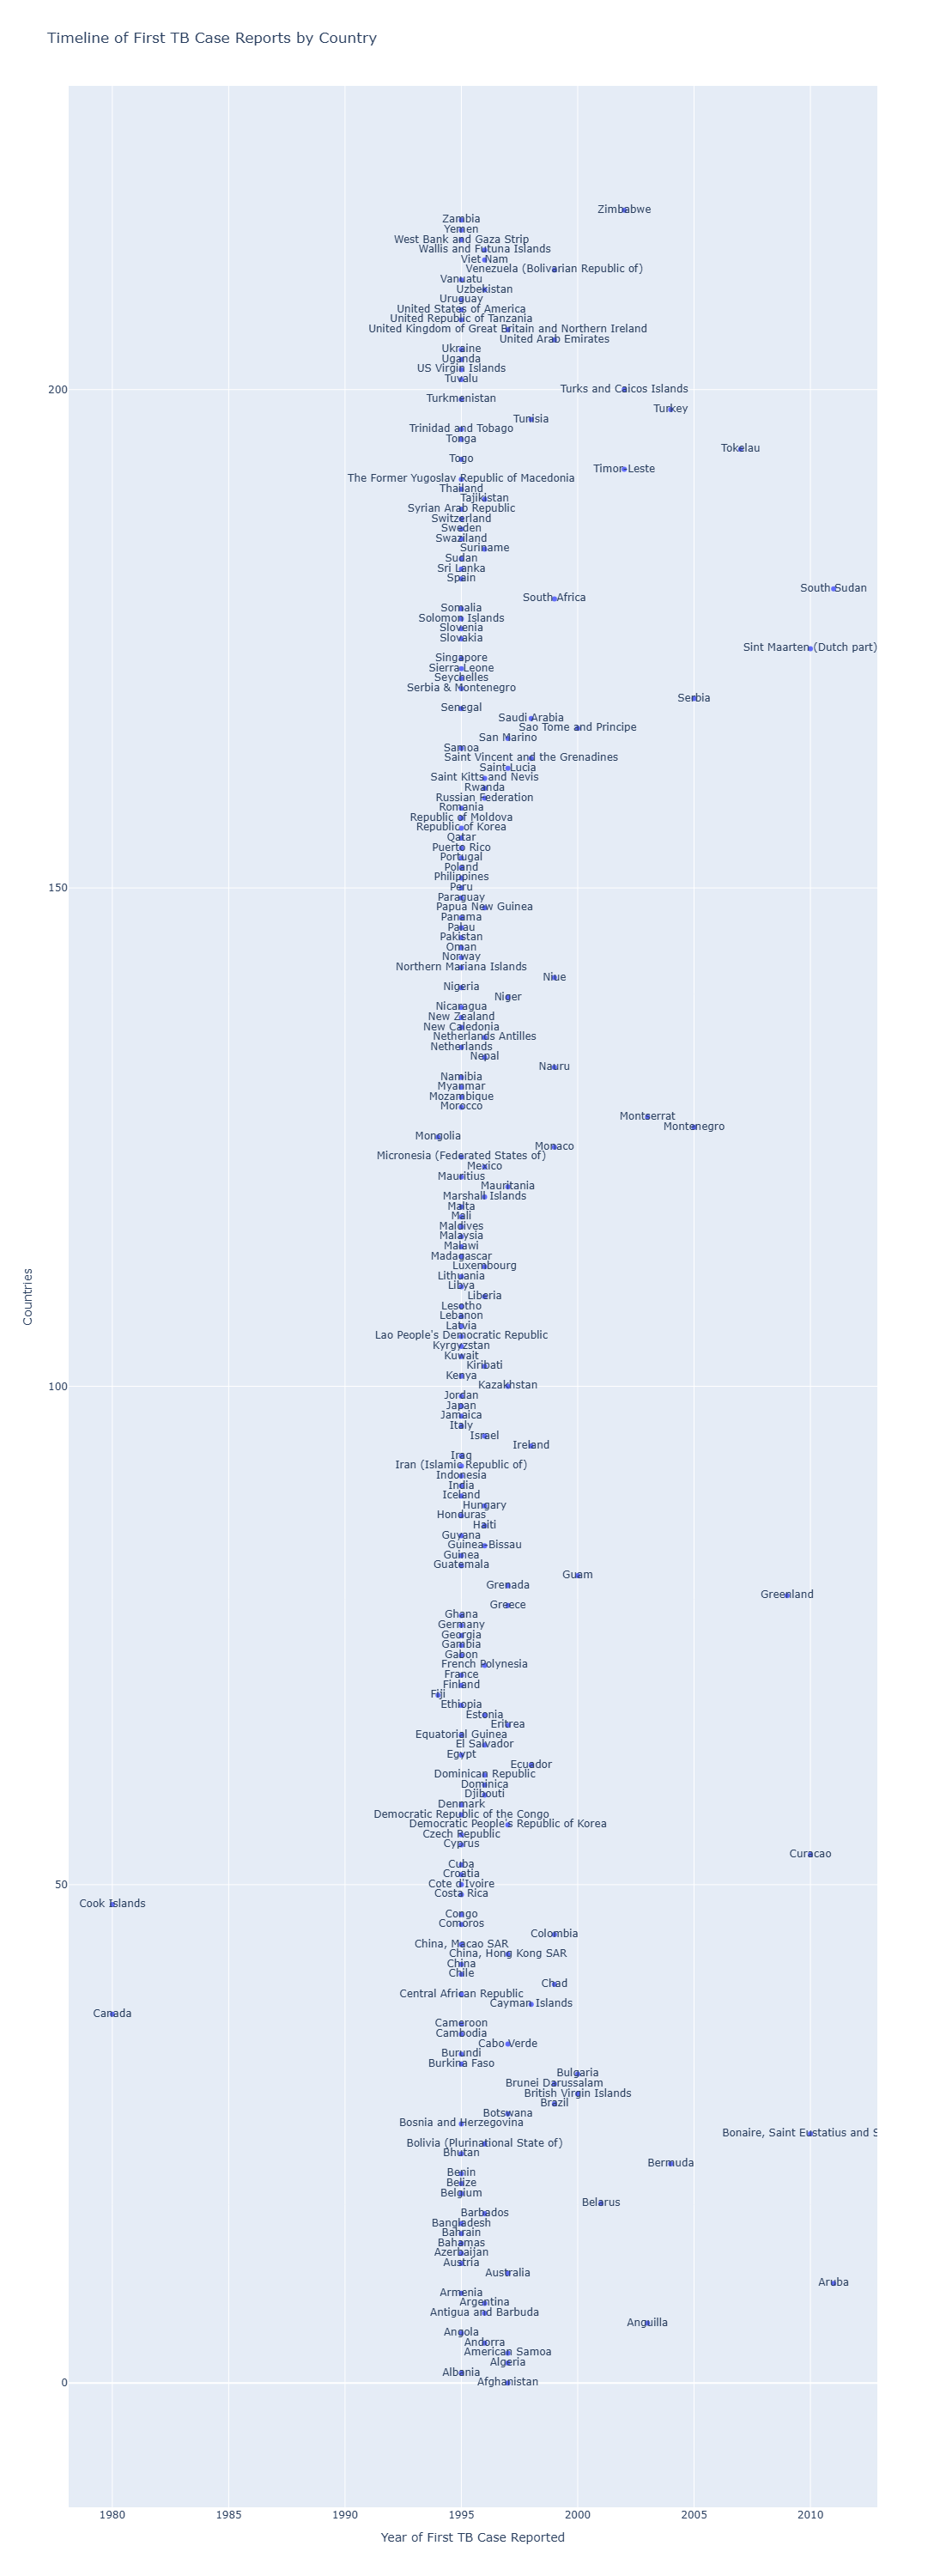

In [84]:
import plotly.express as px
# Create a scatter plot with hover functionality
fig = px.scatter(first_reporting_year, 
                 x='year', 
                 y=first_reporting_year.index, 
                 text='country',  # This will display the country names on hover
                 labels={'year': 'Year of First TB Case Reported', 'index': 'Countries'},
                 title="Timeline of First TB Case Reports by Country")
# Adjust the size of the plot to make it clear
fig.update_layout(
    width=1000,  
    height=3000, 
)
# Show the plot
fig.show()